<a href="https://colab.research.google.com/github/PawasePranjal/United-Airline-Hackathon-Ace-Team/blob/main/United_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Step 1: Data Understanding and Preparation**
To begin, we load the dataset and ensure the key datetime columns are in the correct format for calculating Average Handle Time (AHT) and Average Speed to Answer (AST). Handling missing values is a priority, particularly for elite_level_code and primary_call_reason. Filling in Unknown and Other allows for consistent analysis.


In [ ]:
# Importing necessary libraries
import pandas as pd
df=pd.read_csv("call_centre_data.csv")
df

,customer_id,customer_name,elite_level_code,call_id,primary_call_reason,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average,call_start_datetime,agent_assigned_datetime,call_end_datetime
0,2033123310,Matthew Foster,4.0,7.732610e+09,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34
1,8186702651,Tammy Walters,NaN,2.400300e+09,Booking,519057,calm,neutral,0.02,0.35,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18
2,2416856629,Jeffery Dixon,NaN,6.533095e+09,IRROPS,158319,neutral,polite,-0.13,0.32,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26
3,1154544516,David Wilkins,2.0,7.774451e+09,Upgrade,488324,neutral,frustrated,-0.20,0.20,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17
4,5214456437,Elizabeth Daniels,0.0,9.214147e+09,Seating,721730,neutral,polite,-0.05,0.35,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,8022667294,Dennis Singleton DDS,NaN,NaN,NaN,413148,calm,calm,0.05,0.34,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25
71806,4474867021,Paul Mitchell,1.0,NaN,NaN,980156,calm,frustrated,0.03,0.22,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06
71807,9762042472,Kaylee Lang,NaN,NaN,NaN,616988,calm,polite,0.05,0.42,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04
71808,8095620266,Christine Oneal,1.0,NaN,NaN,161354,neutral,polite,-0.07,0.13,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03


In [ ]:
# Convert date and time columns to datetime format
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])
df['agent_assigned_datetime'] = pd.to_datetime(df['agent_assigned_datetime'])


In [ ]:
# Handling missing values
df['elite_level_code'].fillna('Unknown', inplace=True)
df['primary_call_reason'].fillna('Other', inplace=True)


<ipython-input-51-323ab615882b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['elite_level_code'].fillna('Unknown', inplace=True)
<ipython-input-51-323ab615882b>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['elite_level_code'].fillna('Unknown', inplace=True)
<ipython-input-51-323ab615882b>:3: FutureWarning: A value is trying to be set

In [ ]:
# Preview the first few rows
df.head()


,customer_id,customer_name,elite_level_code,call_id,primary_call_reason,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average,call_start_datetime,agent_assigned_datetime,call_end_datetime
0,2033123310,Matthew Foster,4.0,7.732610e+09,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00
1,8186702651,Tammy Walters,Unknown,2.400300e+09,Booking,519057,calm,neutral,0.02,0.35,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00
2,2416856629,Jeffery Dixon,Unknown,6.533095e+09,IRROPS,158319,neutral,polite,-0.13,0.32,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00
3,1154544516,David Wilkins,2.0,7.774451e+09,Upgrade,488324,neutral,frustrated,-0.20,0.20,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00
4,5214456437,Elizabeth Daniels,0.0,9.214147e+09,Seating,721730,neutral,polite,-0.05,0.35,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00


**Step 2: Calculating Key Metrics (AHT and AST)**
Next, we calculate the critical metrics: AHT (time spent handling a call) and AST (the time before an agent takes the call). These metrics are central to our analysis and will guide performance improvement efforts.


In [ ]:
# Calculate Handle Time (AHT) in minutes
df['handle_time'] = (df['call_end_datetime'] - df['call_start_datetime']).dt.total_seconds() / 60


In [ ]:
# Calculate Speed to Answer (AST) in minutes
df['speed_to_answer'] = (df['agent_assigned_datetime'] - df['call_start_datetime']).dt.total_seconds() / 60


In [ ]:
# Calculate overall AHT and AST
aht = df['handle_time'].mean()
ast = df['speed_to_answer'].mean()
print(f"Average Handle Time (AHT): {aht:.2f} minutes")
print(f"Average Speed to Answer (AST): {ast:.2f} minutes")


Average Handle Time (AHT): 18.90 minutes
Average Speed to Answer (AST): 7.28 minutes


**Step 3: Analyzing Call Reasons for AHT**
We now focus on understanding which call reasons are leading to higher AHT and AST. By identifying the top call reasons causing delays, we can prioritize automation or IVR improvements for these scenarios.


In [ ]:
# Group by primary call reason and calculate the average AHT for each reason
aht_by_reason = df.groupby('primary_call_reason')['handle_time'].mean().sort_values(ascending=False)
ast_by_reason = df.groupby('primary_call_reason')['speed_to_answer'].mean().sort_values(ascending=False)


In [ ]:
# Display the top 5 call reasons with highest AHT and AST
print("Top 5 Call Reasons by AHT:")
print(aht_by_reason.head(5))
print("\nTop 5 Call Reasons by AST:")
print(ast_by_reason.head(5))


Top 5 Call Reasons by AHT:
primary_call_reason
Traveler Updates       25.200000
ETC                    24.727273
Mileage  Plus          22.948148
Seating                22.190141
Unaccompanied Minor    21.728155
Name: handle_time, dtype: float64

Top 5 Call Reasons by AST:
primary_call_reason
Unaccompanied Minor      9.000000
Disability               8.000000
Voluntary  Change        7.738255
Traveler  Updates        7.736842
Traveler   Updates       7.615385
Name: speed_to_answer, dtype: float64


**Step 4: Analyzing Agent and Customer Tone Impact**

Here, we assess the impact of both customer and agent tones on AHT and AST. By understanding the relationship between tones such as "angry" or "frustrated" and longer handle times, we can provide insights into potential agent training needs.


In [ ]:
# Group by customer tone and calculate average AHT and AST
aht_by_customer_tone = df.groupby('customer_tone')['handle_time'].mean()
ast_by_customer_tone = df.groupby('customer_tone')['speed_to_answer'].mean()


In [ ]:
# Group by agent tone and calculate average AHT and AST
aht_by_agent_tone = df.groupby('agent_tone')['handle_time'].mean()
ast_by_agent_tone = df.groupby('agent_tone')['speed_to_answer'].mean()


In [ ]:
# Display results
print("AHT by Customer Tone:")
print(aht_by_customer_tone)
print("\nAST by Customer Tone:")
print(ast_by_customer_tone)
print("\nAHT by Agent Tone:")
print(aht_by_agent_tone)
print("\nAST by Agent Tone:")
print(ast_by_agent_tone)


AHT by Customer Tone:
customer_tone
angry         18.866255
calm          18.957273
frustrated    18.825702
neutral       19.089657
polite        18.769327
Name: handle_time, dtype: float64

AST by Customer Tone:
customer_tone
angry         7.274084
calm          7.297205
frustrated    7.280056
neutral       7.295901
polite        7.274998
Name: speed_to_answer, dtype: float64

AHT by Agent Tone:
agent_tone
angry         13.658098
calm          17.833799
frustrated    17.357763
neutral       19.745334
polite        11.356322
Name: handle_time, dtype: float64

AST by Agent Tone:
agent_tone
angry         7.084833
calm          7.392138
frustrated    7.073290
neutral       7.240727
polite        7.689655
Name: speed_to_answer, dtype: float64


**Step 5: Identifying Self-Solvable Issues for IVR Improvement**

By identifying calls that can be self-solved through the IVR system (e.g., Booking, Mileage Plus, Seating), we can significantly reduce AHT. This step ensures that we prioritize automating high-volume and easily resolvable issues.


In [ ]:
# Filter common self-solvable issues
self_solvable_reasons = ['Booking', 'Mileage Plus', 'Seating']


In [ ]:
# Calculate average AHT for self-solvable issues
aht_self_solvable = df[df['primary_call_reason'].isin(self_solvable_reasons)].groupby('primary_call_reason')['handle_time'].mean()
print("AHT for Self-Solvable Issues:")
print(aht_self_solvable)


AHT for Self-Solvable Issues:
primary_call_reason
Booking         18.934724
Mileage Plus    18.879351
Seating         18.634581
Name: handle_time, dtype: float64


**Step 6: Advanced Insights – Predicting Call Reason**

To further optimize performance, we explore using machine learning to predict call reasons based on features such as tone, sentiment, and silence percentage. This can help in automating routing or prioritizing calls effectively.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Calculate average AHT for self-solvable issues
aht_self_solvable = df[df['primary_call_reason'].isin(self_solvable_reasons)].groupby('primary_call_reason')['handle_time'].mean()
print("AHT for Self-Solvable Issues:")
print(aht_self_solvable)


AHT for Self-Solvable Issues:
primary_call_reason
Booking         18.934724
Mileage Plus    18.879351
Seating         18.634581
Name: handle_time, dtype: float64


In [ ]:
# Prepare the features and target variable
X = df[['agent_tone', 'customer_tone', 'average_sentiment', 'silence_percent_average']]
y = df['primary_call_reason']


In [ ]:
# Convert categorical variables to numerical
X = pd.get_dummies(X, drop_first=True)
y = LabelEncoder().fit_transform(y)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Model Accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy for Predicting Call Reason: {accuracy:.2f}")


Model Accuracy for Predicting Call Reason: 0.10


#**Visualization:**
**Visualizing Call Reasons for AHT and AS:**
A bar plot can be a great way to compare AHT and AST across different call reasons. This will allow us to identify which types of calls have the most impact on performance metrics.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Set the plot style
sns.set(style="whitegrid")


<ipython-input-72-15035c62f0bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aht_by_reason.index, y=aht_by_reason.values, palette="Blues_d")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

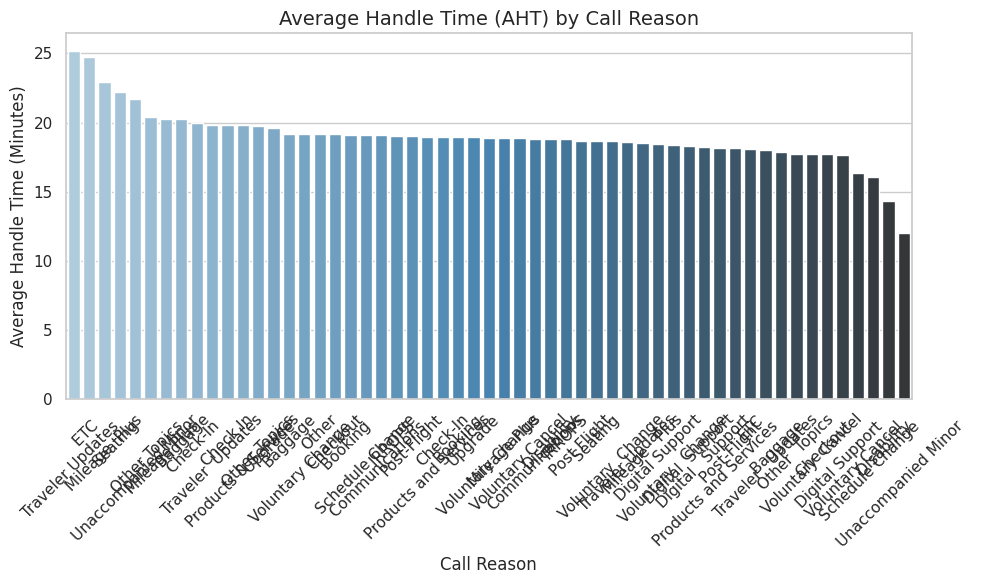

In [ ]:
# Create a bar plot for AHT by call reason
plt.figure(figsize=(10, 6))
sns.barplot(x=aht_by_reason.index, y=aht_by_reason.values, palette="Blues_d")
plt.title("Average Handle Time (AHT) by Call Reason", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Call Reason")
plt.ylabel("Average Handle Time (Minutes)")
plt.tight_layout()
plt.show()

<ipython-input-73-75c87f7a96b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ast_by_reason.index, y=ast_by_reason.values, palette="Greens_d")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

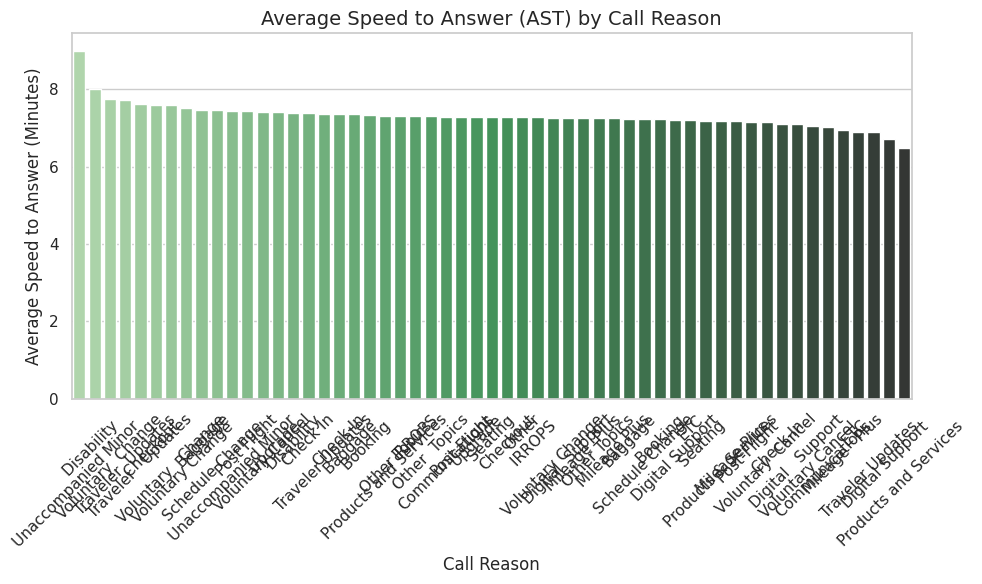

In [ ]:
# Create a bar plot for AST by call reason
plt.figure(figsize=(10, 6))
sns.barplot(x=ast_by_reason.index, y=ast_by_reason.values, palette="Greens_d")
plt.title("Average Speed to Answer (AST) by Call Reason", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Call Reason")
plt.ylabel("Average Speed to Answer (Minutes)")
plt.tight_layout()
plt.show()


**Visualizing the Impact of Tones on AHT and AST**

To assess the influence of customer tone and agent tone on AHT and AST, we can use grouped bar plots. These plots help to compare the average handle time and speed to answer for different tones.


<ipython-input-74-6676abd9ce25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aht_by_customer_tone.index, y=aht_by_customer_tone.values, palette="coolwarm")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning

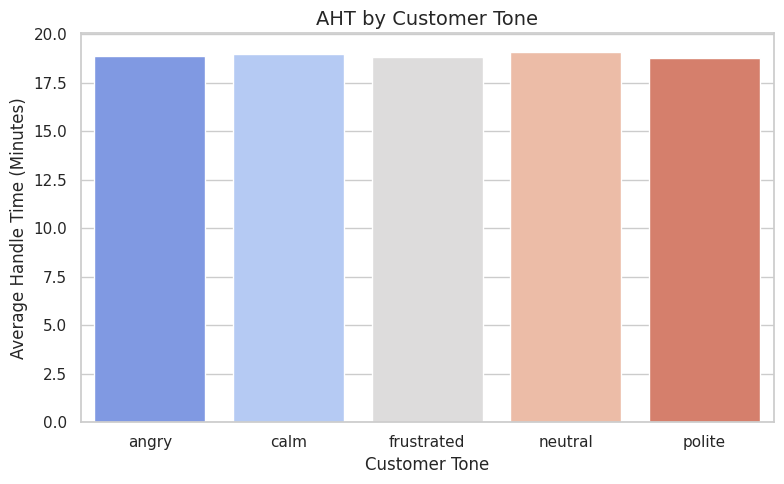

In [ ]:

# AHT by Customer Tone
plt.figure(figsize=(8, 5))
sns.barplot(x=aht_by_customer_tone.index, y=aht_by_customer_tone.values, palette="coolwarm")
plt.title("AHT by Customer Tone", fontsize=14)
plt.xlabel("Customer Tone")
plt.ylabel("Average Handle Time (Minutes)")
plt.tight_layout()
plt.show()


<ipython-input-75-e96de6b01696>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ast_by_customer_tone.index, y=ast_by_customer_tone.values, palette="coolwarm")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning

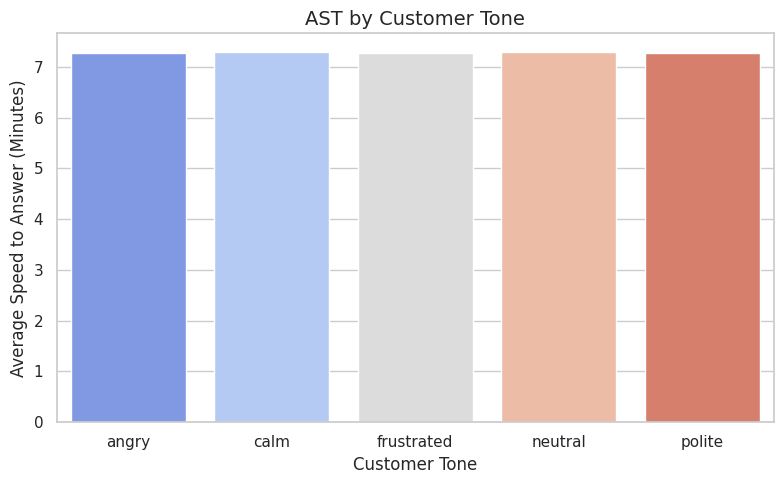

In [ ]:
# AST by Customer Tone
plt.figure(figsize=(8, 5))
sns.barplot(x=ast_by_customer_tone.index, y=ast_by_customer_tone.values, palette="coolwarm")
plt.title("AST by Customer Tone", fontsize=14)
plt.xlabel("Customer Tone")
plt.ylabel("Average Speed to Answer (Minutes)")
plt.tight_layout()
plt.show()


<ipython-input-76-e96de6b01696>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ast_by_customer_tone.index, y=ast_by_customer_tone.values, palette="coolwarm")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning

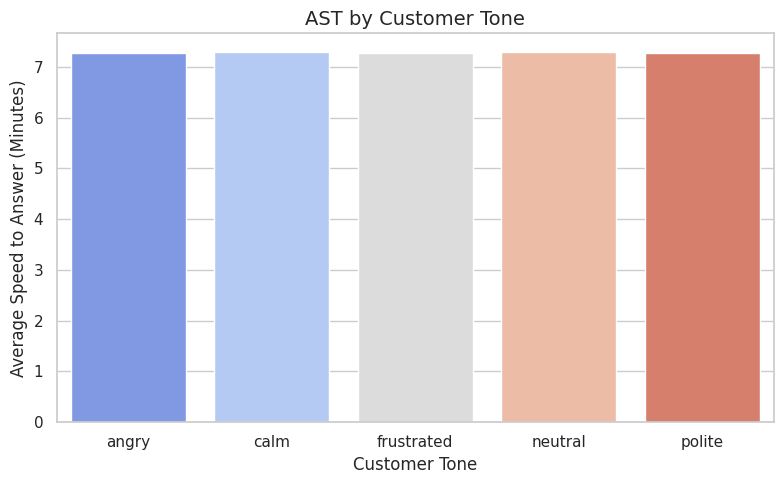

In [ ]:
# AST by Customer Tone
plt.figure(figsize=(8, 5))
sns.barplot(x=ast_by_customer_tone.index, y=ast_by_customer_tone.values, palette="coolwarm")
plt.title("AST by Customer Tone", fontsize=14)
plt.xlabel("Customer Tone")
plt.ylabel("Average Speed to Answer (Minutes)")
plt.tight_layout()
plt.show()


<ipython-input-77-3f0b45eccdca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ast_by_agent_tone.index, y=ast_by_agent_tone.values, palette="Purples_d")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Whe

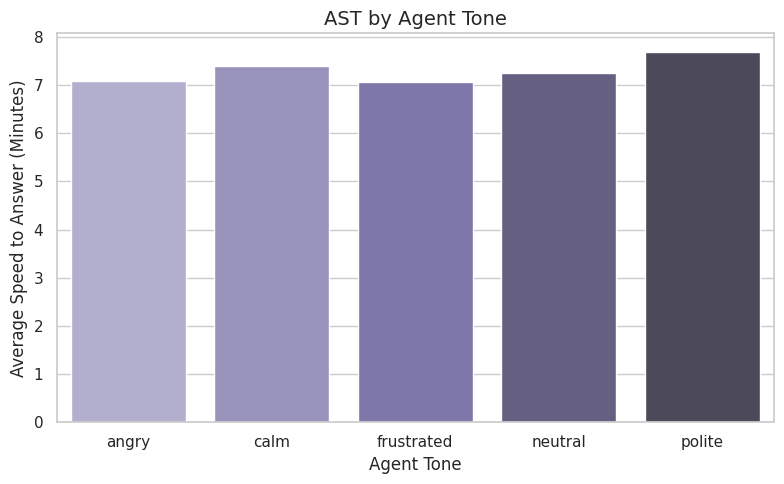

In [ ]:
# AST by Agent Tone
plt.figure(figsize=(8, 5))
sns.barplot(x=ast_by_agent_tone.index, y=ast_by_agent_tone.values, palette="Purples_d")
plt.title("AST by Agent Tone", fontsize=14)
plt.xlabel("Agent Tone")
plt.ylabel("Average Speed to Answer (Minutes)")
plt.tight_layout()
plt.show()


**Visualizing Self-Solvable Issues for IVR Optimization**

A pie chart is a suitable option for showing the distribution of self-solvable issues. This visualization will help highlight the proportion of common issues that could be automated in the IVR system to reduce AHT.


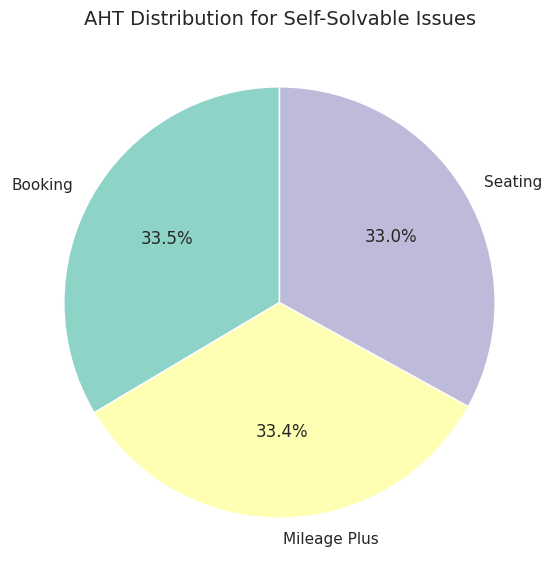

In [ ]:
# Pie chart for self-solvable issues
plt.figure(figsize=(7, 7))
aht_self_solvable.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title("AHT Distribution for Self-Solvable Issues", fontsize=14)
plt.ylabel("")  # Hide y-axis label for better visualization
plt.show()


**Advanced Insights – Visualizing Call Reason Prediction**

If machine learning is applied for call reason prediction, a confusion matrix will visually represent how well the model performs in classifying the call reasons, which helps identify areas for improvement in prediction accuracy.
\

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)


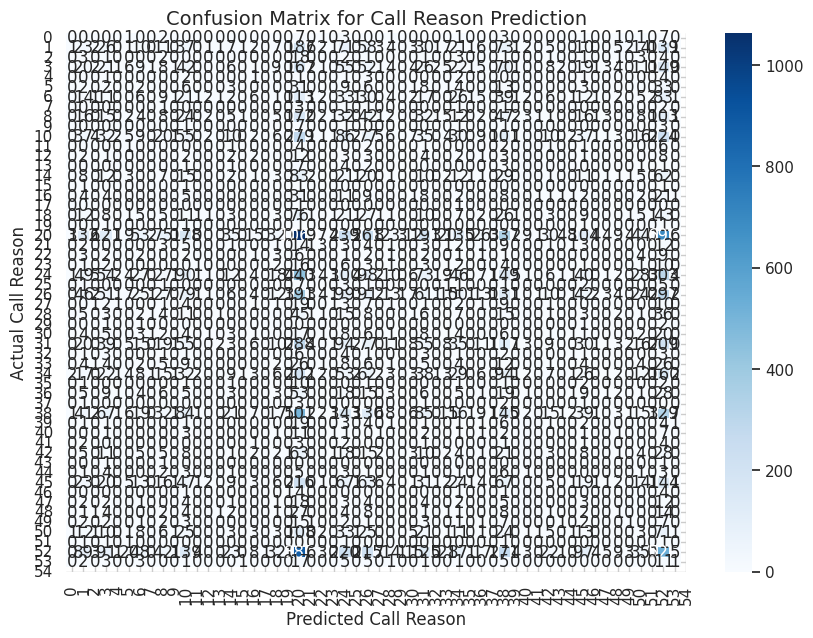

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix for Call Reason Prediction", fontsize=14)
plt.xlabel("Predicted Call Reason")
plt.ylabel("Actual Call Reason")
plt.show()


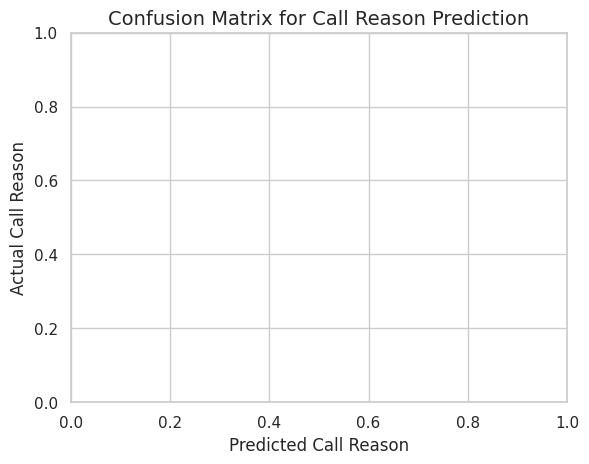

In [ ]:
plt.title("Confusion Matrix for Call Reason Prediction", fontsize=14)
plt.xlabel("Predicted Call Reason")
plt.ylabel("Actual Call Reason")
plt.show()
